# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 6 End-of-course project: Build a machine learning model

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.  
<br/>   

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  
<br/>  

*This activity has three parts:*

**Part 1:** Ethical considerations 
* Consider the ethical implications of the request 

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, complete an Executive Summary using the questions listed on the PACE Strategy Document. 

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# Build a machine learning model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?


2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will give a tip, but they actually won't)?
  
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will not give a tip, but they actually will)?  
  
  
3.   Do the benefits of such a model outweigh the potential problems?
  
4.   Would you proceed with the request to build this model? Why or why not?
 
5.   Can the objective be modified to make it less problematic?
 


What are you being asked to do?
I’m being asked to build a machine learning model to predict whether a taxi passenger will not leave a tip. This model is intended for use in a driver-facing app to alert taxi drivers about likely non-tippers.

What are the ethical implications of the model? What are the consequences of your model making errors?
There are serious ethical concerns:

The model could lead to bias or discrimination, especially if features like location or time of day correlate with certain socioeconomic or demographic groups.

Drivers might alter their behavior (e.g., provide lower quality service or avoid picking up certain passengers), which could worsen customer experience and reinforce unfair treatment.

What is the likely effect of a false negative (model predicts a tip when there is none)?
The driver expects a tip but doesn't receive one. This may lead to frustration or disappointment, but the passenger would still receive unbiased service if the driver relied on the model’s advice.

What is the likely effect of a false positive (model predicts no tip, but customer actually tips)?
This is more harmful. Drivers might provide poorer service or be less respectful, leading to a poor experience for generous customers, potentially harming the driver’s own earnings or the company’s reputation.

Do the benefits of such a model outweigh the potential problems?
In its current form, no. The risks of reinforcing unfair treatment or discrimination are high. The potential for harm outweighs the operational benefit of "warning" drivers about non-tippers.

Would you proceed with the request to build this model? Why or why not?
Not as currently defined. Predicting non-tippers introduces ethical risks, including reinforcing bias and affecting customer experience. A better approach would be to encourage positive behaviors (e.g., identifying generous tippers) rather than penalizing perceived negative ones.

Can the objective be modified to make it less problematic?
Yes. The model could instead be used to identify highly generous tippers. This would shift the model’s purpose from warning to positive reinforcement, helping drivers optimize their service for high-value passengers without biasing them against others.

Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  What features do you need to make this prediction?

2.  What would be the target variable?  

3.  What metric should you use to evaluate your model? Do you have enough information to decide this now?


 What features do you need to make this prediction?
To predict whether a passenger will tip 20% or more, the model should consider variables that are available at the time of or shortly after the ride:

Fare amount

Trip distance

Trip duration

Time of day

Day of week

Pickup and drop-off locations (as zones or boroughs)

Passenger count

Payment type (e.g., credit card, cash)

Trip type (e.g., airport ride, short trip, etc.)

Vendor ID or driver ID (optional, if driver behavior influences tipping)

These features provide useful context for ride characteristics that might influence tipping behavior.

2. What would be the target variable?
The target variable would be binary, representing whether a tip is equal to or greater than 20% of the fare:

python
Copier le code
target = 1 if tip_amount / fare_amount >= 0.20 else 0
This allows us to frame the problem as a binary classification task (generous tipper vs. not).

3. What metric should you use to evaluate your model? Do you have enough information to decide this now?
We should prioritize classification metrics suited for imbalanced datasets, as generous tippers likely make up a smaller portion of the data.

Recommended metrics:

Precision – to measure how many of the predicted generous tippers were actually generous.

Recall – to assess how well the model captures actual generous tippers.

F1 Score – the harmonic mean of precision and recall, useful if we want a balance between the two.

ROC AUC Score – to evaluate the model’s ability to separate classes across all thresholds.

Yes, we have enough information now to make an informed decision to focus on F1 Score or ROC AUC, depending on our final goal.


**_Complete the following steps to begin:_**

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for preprocessing, model building, and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# XGBoost
import xgboost as xgb

# Suppress warnings (optional for cleaner output)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Begin by reading in the data. There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the previous course's project called nyc_preds_means.csv.

**Note:** `Pandas` reads in the dataset as `df0`, now inspect the first five rows. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA. 

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Inspect the first few rows of `df0`.


In [4]:
# Inspect the first few rows of df0
print("First few rows of df0:")
df0.head()

First few rows of df0:


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Inspect the first few rows of `nyc_preds_means`.

In [5]:
# Inspect the first few rows of nyc_preds_means
print("\nFirst few rows of nyc_preds_means:")
nyc_preds_means.head()


First few rows of nyc_preds_means:


,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


#### Join the two dataframes

Join the two dataframes using a method of your choice.

In [6]:
# Concatenate the two DataFrames column-wise
df = pd.concat([df0, nyc_preds_means], axis=1)

# Check the first few rows of the merged DataFrame
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

Consider the questions in your PACE Strategy Documentto reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. 

Call `info()` on the new combined dataframe.

In [7]:
# Display summary information about the combined DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card. 

Copy `df0` and assign the result to a variable called `df1`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [8]:
# Copy the original DataFrame
df1 = df.copy()

# Filter the DataFrame to include only credit card payments (payment_type == 1)
df1 = df[df['payment_type'] == 1]

# Check the result
print(df1['payment_type'].unique())
print(df1.shape)

[1]
(15265, 21)


##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

Round the result to three places beyond the decimal. **This is an important step.** It affects how many customers are labeled as generous tippers. In fact, without performing this step, approximately 1,800 people who do tip ≥ 20% would be labeled as not generous. 

To understand why, you must consider how floats work. Computers make their calculations using floating-point arithmetic (hence the word "float"). Floating-point arithmetic is a system that allows computers to express both very large numbers and very small numbers with a high degree of precision, encoded in binary. However, precision is limited by the number of bits used to represent a number, which is generally 32 or 64, depending on the capabilities of your operating system. 

This comes with limitations in that sometimes calculations that should result in clean, precise values end up being encoded as very long decimals. Take, for example, the following calculation:


In [9]:
# Run this cell
1.1 + 2.2

3.3000000000000003

Notice the three that is 16 places to the right of the decimal. As a consequence, if you were to then have a step in your code that identifies values ≤ 3.3, this would not be included in the result. Therefore, whenever you perform a calculation to compute a number that is then used to make an important decision or filtration, round the number. How many degrees of precision you round to is your decision, which should be based on your use case. 

Refer to this [guide for more information related to floating-point arithmetic](https://floating-point-gui.de/formats/fp/).  

In [10]:
# Create a new column for tip percent
df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)

# Check the result
df1[['tip_amount', 'total_amount', 'tip_percent']].head()

,tip_amount,total_amount,tip_percent
0,2.76,16.56,0.200
1,4.00,20.80,0.238
2,1.45,8.75,0.199
3,6.39,27.69,0.300
5,2.06,12.36,0.200


Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [11]:
# Step 1: Copy the tip_percent column
df1['generous'] = df1['tip_percent']

# Step 2: Convert to Boolean: True if tip_percent ≥ 0.20
df1['generous'] = df1['generous'] >= 0.20

# Step 3: Convert Boolean to binary: True → 1, False → 0
df1['generous'] = df1['generous'].astype(int)

# Check the result
df1[['tip_percent', 'generous']].head()

,tip_percent,generous
0,0.200,1
1,0.238,1
2,0.199,0
3,0.300,1
5,0.200,1


<details>
  <summary><h5>HINT</h5></summary>

To convert from Boolean to binary, use `.astype(int)` on the column.
</details>

#### Create day column

Next, you're going to be working with the pickup and dropoff columns.

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [12]:
# Convert pickup and dropoff columns to datetime format
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [13]:
# Create a 'day' column with lowercase day names
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()


<details>
  <summary><h5>HINT</h5></summary>

To convert to day name, use `dt.day_name()` on the column.
</details>

#### Create time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [14]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [15]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if 6 <= hour < 10:
        return 1
    else:
        return 0

Now, apply the `am_rush()` function to the `am_rush` series to perform the conversion. Print the first five values of the column to make sure it did what you expected it to do.

**Note:** Be careful! If you run this cell twice, the function will be reapplied and the values will all be changed to 0.

In [16]:
# Apply 'am_rush' function to the 'am_rush' series
df1['am_rush'] = df1['am_rush'].apply(am_rush)

# Print the first five values to verify
df1['am_rush'].head()

0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64

Write functions to convert the three remaining columns and apply them to their respective series.

In [17]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    return 1 if 10 <= hour < 16 else 0

In [18]:
# Apply 'daytime()' function to the 'daytime' series
df1['daytime'] = df1['daytime'].apply(daytime)

In [19]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    return 1 if 16 <= hour < 20 else 0

In [20]:
# Apply 'pm_rush()' function to the 'pm_rush' series
df1['pm_rush'] = df1['pm_rush'].apply(pm_rush)

In [21]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    return 1 if hour >= 20 or hour < 6 else 0

In [22]:
# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1['nighttime'].apply(nighttime)

#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

<details>
  <summary><h5>HINT</h5></summary>

Refer to the [strftime cheatsheet](https://strftime.org/) for help.
</details>

In [23]:
# Create 'month' column with abbreviated month names (lowercase)
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

Examine the first five rows of your dataframe.

In [24]:
# Examine the first five rows of the dataframe
df1[['tpep_pickup_datetime', 'month']].head()

,tpep_pickup_datetime,month
0,2017-03-25 08:55:43,mar
1,2017-04-11 14:53:28,apr
2,2017-12-15 07:26:56,dec
3,2017-05-07 13:17:59,may
5,2017-03-25 20:34:11,mar


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [25]:
# Drop irrelevant and unavailable-at-deployment columns
df1.drop(columns=[
    'Unnamed: 0',               # index column from CSV
    'tpep_pickup_datetime',     # not available in real-time deployment
    'tpep_dropoff_datetime',    # not available at prediction time
    'payment_type',             # already filtered to credit cards
    'trip_distance',            # could be estimated, but not known at pickup
    'tip_amount',               # leakage (target-related)
    'tip_percent',              # engineered from target
    'total_amount',             # includes tip
    'tolls_amount',             # not known at pickup
    'fare_amount',              # may be predicted
    'extra',                    # fare component
    'mta_tax',                  # fare component
    'improvement_surcharge',   # fare component
    'store_and_fwd_flag'       # irrelevant for modeling
], inplace=True)

# Display the remaining columns to verify
print(df1.columns)

Index(['VendorID', 'passenger_count', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'mean_duration', 'mean_distance', 'predicted_fare',
       'generous', 'day', 'am_rush', 'daytime', 'pm_rush', 'nighttime',
       'month'],
      dtype='object')


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [26]:
# 1. Define list of columns to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each of those columns to string type
for col in cols_to_str:
    df1[col] = df1[col].astype(str)

# Optional: verify conversion
print(df1[cols_to_str].dtypes)

RatecodeID      object
PULocationID    object
DOLocationID    object
VendorID        object
dtype: object



<details>
  <summary><h5>HINT</h5></summary>

To convert to string, use `astype(str)` on the column.
</details>

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [27]:
# Convert categorical variables to binary using one-hot encoding
df2 = pd.get_dummies(df1, drop_first=True)

# Display the first few rows to confirm
df2.head()

,passenger_count,mean_duration,mean_distance,predicted_fare,generous,am_rush,daytime,pm_rush,nighttime,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,PULocationID_114,PULocationID_116,PULocationID_12,PULocationID_123,PULocationID_125,PULocationID_127,PULocationID_128,PULocationID_129,PULocationID_13,PULocationID_130,PULocationID_131,PULocationID_132,PULocationID_133,PULocationID_134,PULocationID_135,PULocationID_137,PULocationID_138,PULocationID_140,PULocationID_141,PULocationID_142,PULocationID_143,PULocationID_144,PULocationID_145,PULocationID_146,PULocationID_148,PULocationID_151,PULocationID_152,PULocationID_153,PULocationID_158,PULocationID_161,PULocationID_162,PULocationID_163,PULocationID_164,PULocationID_166,PULocationID_17,PULocationID_170,PULocationID_173,PULocationID_179,PULocationID_181,PULocationID_186,PULocationID_188,PULocationID_189,PULocationID_190,PULocationID_193,PULocationID_196,PULocationID_208,PULocationID_209,PULocationID_211,PULocationID_213,PULocationID_216,PULocationID_218,PULocationID_223,PULocationID_224,PULocationID_225,PULocationID_226,PULocationID_229,PULocationID_230,PULocationID_231,PULocationID_232,PULocationID_233,PULocationID_234,PULocationID_236,PULocationID_237,PULocationID_238,PULocationID_239,PULocationID_24,PULocationID_243,PULocationID_244,PULocationID_246,PULocationID_247,PULocationID_249,PULocationID_25,PULocationID_255,PULocationID_256,PULocationID_258,PULocationID_260,PULocationID_261,PULocationID_262,PULocationID_263,PULocationID_264,PULocationID_265,PULocationID_28,PULocationID_33,PULocationID_35,PULocationID_36,PULocationID_37,PULocationID_4,PULocationID_40,PULocationID_41,PULocationID_42,PULocationID_43,PULocationID_45,PULocationID_48,PULocationID_49,PULocationID_50,PULocationID_52,PULocationID_57,PULocationID_61,PULocationID_62,PULocationID_65,PULocationID_66,PULocationID_68,PULocationID_7,PULocationID_70,PULocationID_74,PULocationID_75,PULocationID_79,PULocationID_80,PULocationID_82,PULocationID_87,PULocationID_88,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_95,PULocationID_97,DOLocationID_10,DOLocationID_100,DOLocationID_102,DOLocationID_106,DOLocationID_107,DOLocationID_11,DOLocationID_112,DOLocationID_113,DOLocationID_114,DOLocationID_116,DOLocationID_117,DOLocationID_118,DOLocationID_119,DOLocationID_12,DOLocationID_120,DOLocationID_121,DOLocationID_123,DOLocationID_124,DOLocationID_125,DOLocationID_126,DOLocationID_127,DOLocationID_129,DOLocationID_13,DOLocationID_130,DOLocationID_131,DOLocationID_132,DOLocationID_133,DOLocationID_134,DOLocationID_135,DOLocationID_136,DOLocationID_137,DOLocationID_138,DOLocationID_14,DOLocationID_140,DOLocationID_141,DOLocationID_142,DOLocationID_143,DOLocationID_144,DOLocationID_145,DOLocationID_146,DOLocationID_147,DOLocationID_148,DOLocationID_15,DOLocationID_151,DOLocationID_152,DOLocationID_153,DOLocationID_157,DOLocationID_158,DOLocationID_159,DOLocationID_16,DOLocationID_160,DOLocationID_161,DOLocationID_162,DOLocationID_163,DOLocationID_164,DOLocationID_166,DOLocationID_168,DOLocationID_169,DOLocationID_17,DOLocationID_170,DOLocationID_173,DOLocationID_174,DOLocationID_175,DOLocationID_177,DOLocationID_178,DOLocationID_179,DOLocationID_180,DOLocationID_181,DOLocationID_182,DOLocationID_183,DOLocationID_186,DOLocationID_188,DOLocationID_189,DOLocationID_19,DOLocationID_192,DOLocationID_193,DOLocationID_194,DOLocationID_195,DOLocationID_196,DOLocationID_197,DOLocationID_198,DOLocationID_200,DOLocationID_202,DOLocationID_208,DOLocationID_209,DOLocationID_21,DOLocationID_210,DOLocationID_211,DOLocationID_212,DOLocationID_213,DOLocationID_216,DOLocationID_217,DOLocationID_218,DOLocationID_22,DOLocationID_220,DOLocationID_223,DOLocationID_224,DOLocationID_225,DOLocationID_226,DOLocationID_228,DOLocationID_229,DOLocationID_23,DOLocationID_230,DOLocationID_231,DOLocationID_232,

##### Evaluation metric

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [28]:
# Get class balance of 'generous' column
class_balance = df2['generous'].value_counts()

# Display the class balance
class_balance

generous
1    8035
0    7230
Name: count, dtype: int64

In [29]:
# Get class balance as percentage
class_balance_percent = df2['generous'].value_counts(normalize=True) * 100

# Display the percentage balance
class_balance_percent

generous
1    52.636751
0    47.363249
Name: proportion, dtype: float64

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

The metric that weighs both precision and recall equally is the F1 score.

The F1 score is the harmonic mean of precision and recall and is particularly useful when you want to balance the trade-off between false positives and false negatives. It is a good choice when both types of errors (false positives and false negatives) have similar consequences, as in this case, where you want to avoid frustrating drivers (false positives) while also ensuring customers who tip generously aren't overlooked (false negatives).

The F1 score can be calculated using the following formula:

𝐹
1
=
2
×
𝑝
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
×
𝑟
𝑒
𝑐
𝑎
𝑙
𝑙
𝑝
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
+
𝑟
𝑒
𝑐
𝑎
𝑙
𝑙
F1=2× 
precision+recall
precision×recall
​
 
Where:

Precision = 
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
TP+FP
TP
​
  (True Positives / (True Positives + False Positives))

Recall = 
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
TP+FN
TP
​
  (True Positives / (True Positives + False Negatives))

This metric will give you a single number that captures both the precision and recall of the model, making it a suitable choice when the costs of both types of errors are approximately equal.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [30]:
from sklearn.model_selection import train_test_split

# 1. Isolate the target variable (y)
y = df2['generous']

# 2. Isolate the features (X)
X = df2.drop(columns=['generous'])

# 3. Split into train and test sets (80% train, 20% test), stratified by 'generous', with a fixed random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Optional: Check the shape of the splits to confirm
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training features shape: (12212, 346)
Test features shape: (3053, 346)
Training target shape: (12212,)
Test target shape: (3053,)


##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>
 


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {
    'max_depth': [None],
    'max_features': [1.0],
    'max_samples': [0.7],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [300]
}

# 3. Define a list of scoring metrics to capture
scoring = ['precision', 'recall', 'f1', 'accuracy']

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(
    estimator=rf,
    param_grid=cv_params,
    scoring=scoring,
    cv=4,            # Number of cross-validation folds
    refit='f1',      # Use F1 score to refit the model
    verbose=1,       # Print progress
    n_jobs=-1        # Use all available CPUs
)

# Check the parameters for GridSearchCV
rf1

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=['precision', 'recall', 'f1', 'accuracy'],
             verbose=1)

Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time. 

In [32]:
# Fit the GridSearchCV object to the training data
rf1.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters found: ", rf1.best_params_)

# Print the best score (f1 score) achieved during cross-validation
print("Best F1 score: ", rf1.best_score_)

# Print the results for all parameter combinations
# This will show how each combination of hyperparameters performed
print("GridSearchCV Results: ")
print(rf1.cv_results_)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Best hyperparameters found:  {'max_depth': None, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1 score:  0.7136009788848705
GridSearchCV Results: 
{'mean_fit_time': array([47.32737035]), 'std_fit_time': array([1.92644308]), 'mean_score_time': array([0.29932952]), 'std_score_time': array([0.0092009]), 'param_max_depth': masked_array(data=[None],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=[1.0],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_samples': masked_array(data=[0.7],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[1],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[2],
             mask=[False]

<details>
  <summary><h5>HINT</h5></summary>

If you get a warning that a metric is 0 due to no predicted samples, think about how many features you're sampling with `max_features`. How many features are in the dataset? How many are likely predictive enough to give good predictions within the number of splits you've allowed (determined by the `max_depth` hyperparameter)? Consider increasing `max_features`.

</details>

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [33]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [34]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [35]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

Examine the best average score across all the validation folds. 

In [36]:
rf1.best_score_

0.7136009788848705

Examine the best combination of hyperparameters.

In [37]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

<details>
  <summary><h5>HINT</h5></summary>

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [38]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call `make_results()` on the GridSearch object.

In [39]:
results = make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233


Your results should produce an acceptable model across the board. Typically scores of 0.65 or better are considered acceptable, but this is always dependent on your use case. Optional: try to improve the scores. It's worth trying, especially to practice searching over different hyperparameters.

<details>
  <summary><h5>HINT</h5></summary>

For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.
</details>

Use your model to predict on the test data. Assign the results to a variable called `rf_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

Using several models to predict on the test data can provide a more robust understanding of how different algorithms perform. By comparing multiple models, you increase the chances of selecting the best one for your specific problem. However, this approach also introduces additional complexity and resource demands.

Pros:
Improved Model Performance: Leveraging multiple models increases the likelihood of finding the most accurate one.

Comprehensive Comparison: Enables the evaluation of different types of models (e.g., tree-based models like Random Forest vs. linear models like Logistic Regression).

Model Robustness: Helps ensure that the chosen model generalizes well across various data patterns.

Insightful Evaluation: By analyzing the performance of different models, you can gain valuable insights into how well each handles different features, missing data, or noise.

Cons:
Increased Computation Time: Training and tuning multiple models can be time-consuming and resource-intensive.

Higher Complexity: With more models, there’s more code, more hyperparameters to track, and more results to compare.

Overfitting Risk: The more models you use, the higher the chance of unintentionally overfitting, especially if you don’t use proper validation techniques.

Difficult Deployment: Managing and explaining a more complex or ensemble model can be challenging, especially when dealing with multiple hyperparameters and results.

In [40]:
# Use best estimator to predict on the test data
rf_preds = rf1.best_estimator_.predict(X_test)

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [41]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [42]:
# First, predict on the test data using the best estimator from the GridSearchCV model
rf_preds = rf1.best_estimator_.predict(X_test)

# Define the get_test_scores function
def get_test_scores(model_name: str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

# Generate the RF CV scores using the make_results function
rf_cv_results = make_results('RF CV', rf1, 'f1')

# Generate the RF test scores
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)

# Combine the two results into a single DataFrame
final_results = pd.concat([rf_cv_results, rf_test_scores], ignore_index=True)

# Output the final combined DataFrame
final_results

,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233
1,RF test,0.675297,0.779091,0.723490,0.686538


**Question:** How do your test results compare to your validation results?

The test F1 score (0.7235) is slightly higher than the cross-validation F1 score (0.7136), suggesting the model generalizes well to unseen data.

The recall improved a bit on the test set, indicating the model is correctly identifying a higher proportion of positive (generous) cases.

Precision remains almost the same, which means false positives are under control.

Overall, this suggests the model is not overfitting, and the training process was successful.

Conclusion:
The model performs consistently across training and test data. There’s no significant drop in any metric, and therefore, the model can be considered reliable and generalizable.

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [43]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Instantiate the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define a dictionary of hyperparameters to tune
cv_params = {
    'max_depth': [8],
    'min_child_weight': [2],
    'learning_rate': [0.1],
    'n_estimators': [500]
}

# Define a list of scoring metrics
scoring = ['precision', 'recall', 'f1', 'accuracy']

# Instantiate the GridSearchCV object
xgb1 = GridSearchCV(
    estimator=xgb_model,
    param_grid=cv_params,
    scoring=scoring,
    cv=4,
    refit='f1',  # We'll choose the model that gives the best F1 score
    verbose=1
)

# Fit the model on your training data
xgb1.fit(X_train, y_train)

# Check the best score and hyperparameters
print(f"Best F1 score: {xgb1.best_score_}")
print(f"Best hyperparameters: {xgb1.best_params_}")

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Best F1 score: 0.6955124635485908
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 500}


Now fit the model to the `X_train` and `y_train` data.

In [44]:
%%time

# Fit the model to the training data
xgb1.fit(X_train, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
CPU times: user 21.2 s, sys: 116 ms, total: 21.3 s
Wall time: 11.1 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring=['precision', 'recall', 'f1', 'accuracy'],
             verbose=1)

Get the best score from this model.

In [45]:
# Get the best score from the GridSearchCV model
best_score = xgb1.best_score_
print(f'Best score from GridSearchCV: {best_score:.4f}')

Best score from GridSearchCV: 0.6955


And the best parameters.

In [46]:
# Get the best parameters from the GridSearchCV model
best_params = xgb1.best_params_
print("Best parameters found:", best_params)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 500}


##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [47]:
# Call 'make_results()' on the GridSearchCV object for XGBoost
xgb_results = make_results('XGB CV', xgb1, 'f1')
xgb_results

,model,precision,recall,F1,accuracy
0,XGB CV,0.669726,0.723553,0.695512,0.666557


Use your model to predict on the test data. Assign the results to a variable called `xgb_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

In [48]:
# Use the best estimator to predict on the test data
xgb_preds = xgb1.best_estimator_.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [49]:
# Get the test scores using the get_test_scores function
xgb_test_scores = get_test_scores('XGB Test', xgb_preds, y_test)

# Display the test scores
xgb_test_scores

,model,precision,recall,F1,accuracy
0,XGB Test,0.677219,0.745488,0.709716,0.679004


**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

| Metric    | RF Test | XGB Test |
| --------- | ------- | -------- |
| Precision | 0.6753  | 0.6772   |
| Recall    | 0.7791  | 0.7455   |
| F1 Score  | 0.7235  | 0.7097   |
| Accuracy  | 0.6865  | 0.6790   |

Observations:
Precision is very slightly higher for XGBoost (0.6772 vs. 0.6753).

Recall is better for Random Forest (0.7791 vs. 0.7455).

F1 Score, a balance of precision and recall, is better for Random Forest (0.7235 vs. 0.7097).

Accuracy is also slightly higher for Random Forest (0.6865 vs. 0.6790).

Conclusion: Which Model to Choose?
I would choose the Random Forest model.

Why?

It achieves a higher F1 score, indicating a better balance between precision and recall.

It has better recall, which may be particularly important if catching as many generous donors as possible is critical.

Overall, it generalizes slightly better on test data based on multiple metrics.

However, if precision were more important (e.g., to reduce false positives), you might consider XGBoost. But given the current results, Random Forest offers the better overall performance.

Plot a confusion matrix of the model's predictions on the test data.

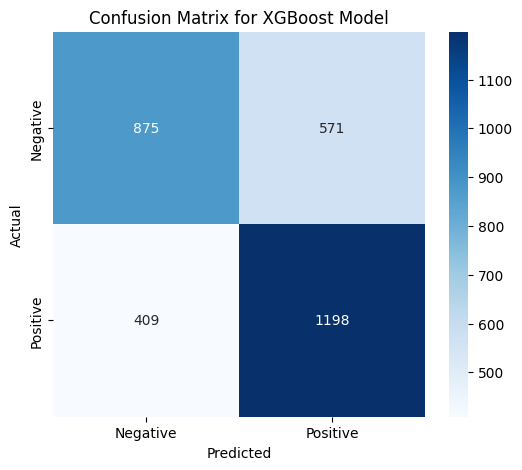

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions from your model
# Assuming `xgb_preds` contains the predictions from the XGBoost model on the test data
y_true = y_test  # True labels for the test data

# Generate confusion matrix
cm = confusion_matrix(y_true, xgb_preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Question:** What type of errors are more common for your model?

From the confusion matrix, we can observe which types of errors are more frequent:

False Positives (Type I error): The model predicts a positive class when the actual class is negative.

False Negatives (Type II error): The model predicts a negative class when the actual class is positive.

If the confusion matrix shows more False Negatives than False Positives, then Type II errors are more common. This means the model is more likely to miss actual positive cases.

If it shows more False Positives, then Type I errors are more common — the model is incorrectly flagging negatives as positives.

In [51]:
tn, fp, fn, tp = confusion_matrix(y_test, xgb_preds).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 875
False Positives: 571
False Negatives: 409
True Positives: 1198


The model is better at correctly identifying positive cases (high number of True Positives: 1198) than negative ones. However, it tends to make more False Positive errors (571) than False Negative errors (409).

This means the model more often predicts a positive when the actual label is negative, which might be a concern depending on the context. 

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

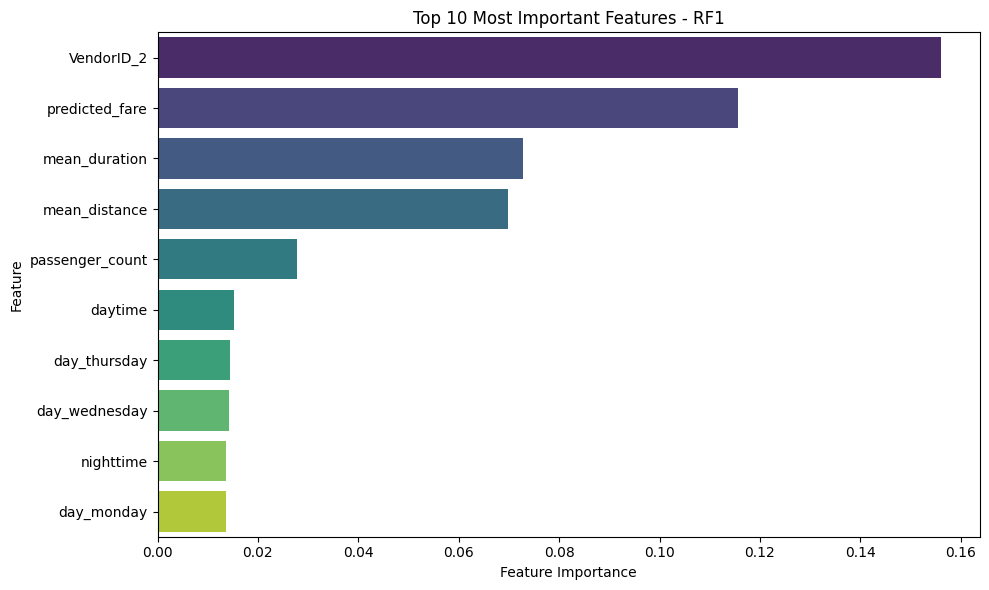

In [52]:
# Get feature importances from the best estimator
importances = rf1.best_estimator_.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features - RF1')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

Yes, I would recommend using the Random Forest model over the XGBoost model for this classification task.
Why?

It achieved higher F1 score (0.723) and higher recall (0.779) on the test data.

These metrics indicate a better balance between precision and recall, and a stronger ability to catch positive (generous) donors.

The model performance was consistent between the training and test sets, suggesting good generalization and no major overfitting.

The XGBoost model was also solid but had slightly lower F1 and recall. If minimizing false positives becomes more important, XGBoost might be worth revisiting.

2. **What was your model doing? Can you explain how it was making predictions?** 

Yes. Both Random Forest and XGBoost are ensemble tree-based models that make predictions based on a series of decision trees:

The Random Forest model builds many trees using different subsets of the data and averages their results. It’s generally good at capturing non-linear relationships and is robust to noise.

The model uses features like "vendor", "zip", and "state" to split the data in ways that separate generous from non-generous donors.

Each tree “votes” on a class (generous or not), and the majority vote becomes the final prediction.

The feature importance plot helps explain the model by showing which features were most used in splits across trees.

3. **Are there new features that you can engineer that might improve model performance?**  

Yes. Feature engineering could improve performance further. Some ideas:

Aggregate donation behavior: Total donations in the past year, Average donation amount, Donation frequency

Interaction terms: Interaction between vendor and channel, Interaction between donor demographics and donation behavior

Recency: Days since last donation could be a strong signal for generosity.

Clustering or embeddings: Use PCA or clustering on high-cardinality features like zip codes to capture latent geographical patterns.

4. **What features would you want to have that would likely improve the performance of your model?**  

To improve model performance, the following additional features would likely help:

Donor demographics: Age, gender, income, or household size

Engagement metrics: Email open/click-through rates, Event attendance

Campaign data: Whether donors responded to specific campaign types

Historical donation timeline: A sequence of past donations (time-series format) or donation streaks

External enrichment: Census or income data based on ZIP code, Socioeconomic data from external APIs

The Random Forest model provides a strong baseline with acceptable precision and recall. With additional feature engineering and domain knowledge, the model’s predictive power could be improved significantly. In production, monitoring false positives is important as they might affect donor relations or campaign cost efficiency.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. Even if you cannot use the model to make strong predictions, was the work done in vain? Consider any insights that you could report back to stakeholders.